<a href="https://colab.research.google.com/github/shervinnd/Persian_Alphabet_Detection/blob/main/Alphabet_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.api import layers
from keras.api.models import Sequential, load_model
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS


Libraries Loaded Successfully


# **Paths to different training datasets**

In [ ]:
DATASET1 = "F:\Programming\Alphabet-Recognition\Datasets\DS-01"
DATASET2 = "F:\Programming\Alphabet-Recognition\Datasets\DS-02"
DATASET3 = "F:\Programming\Alphabet-Recognition\Datasets\DS-03"
REAL_DATA = "F:\Programming\Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

# **Loads the dataset, splits into training and testing sets, prints their shapes, and visualizes one sample image from each of the 42 classes using matplotlib.**

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


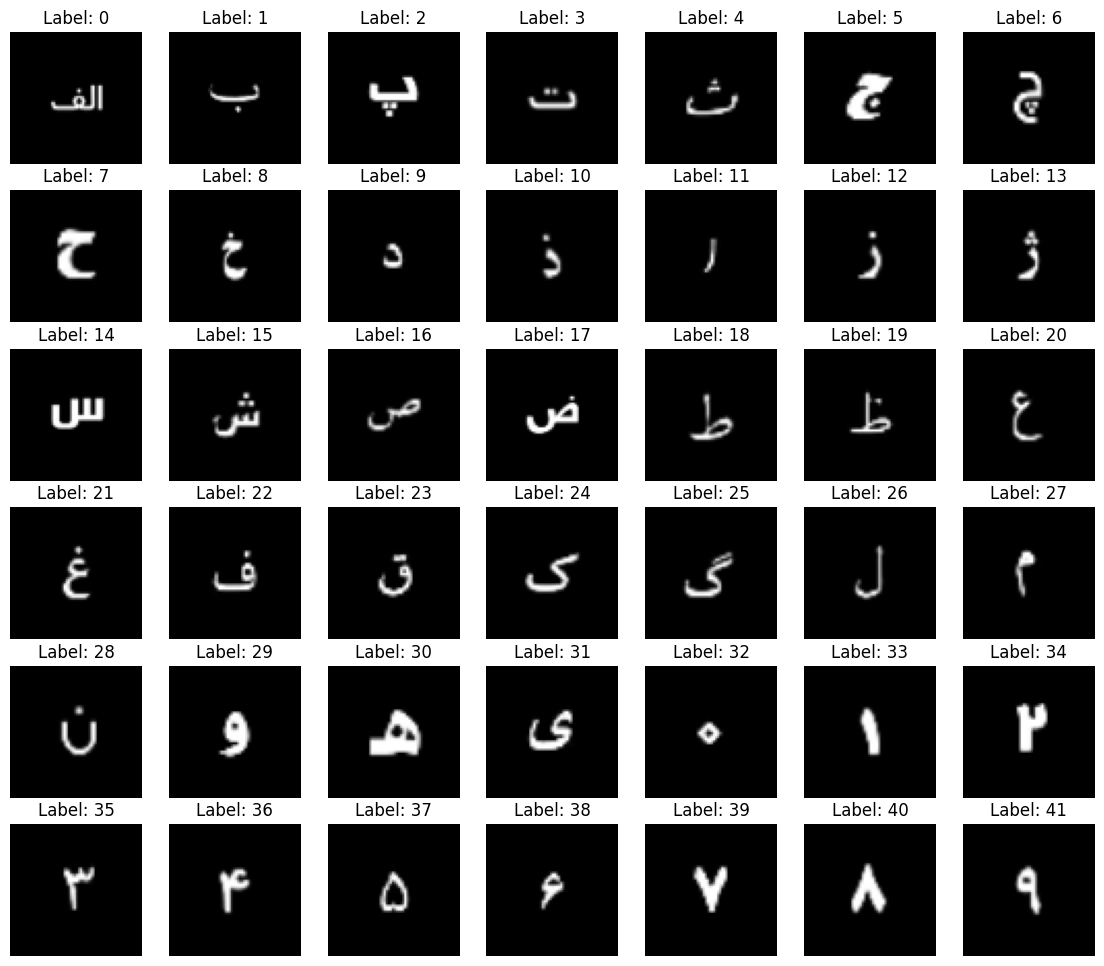

In [ ]:
dataloader1 = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, zoom=0.45, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader1.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

# **Defines a sequential neural network with input shape 64×64, flattens the images, and adds several fully connected (Dense) layers with ReLU activation. The final layer uses softmax to classify into 43 classes. The model summary shows the architecture details.**

In [ ]:
model_1 = Sequential(name='Model-1')

model_1.add(layers.Input(shape=INPUT_SHAPE))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model_1.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model_1.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model_1.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model_1.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_5'))
model_1.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_6'))

model_1.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,164,203 (42.59 MB)

 Trainable params: 11,164,203 (42.59 MB)

 Non-trainable params: 0 (0.00 B)

# **Compiles the model with Adam optimizer and sparse categorical crossentropy loss, trains it for the defined epochs with validation data, stores training/validation accuracy and loss in a DataFrame, and displays the results.**

In [ ]:
model_1.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_1.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training_Accuracy': history.history['accuracy'],
    'Validation_Accuracy': history.history['val_accuracy'],
    'Training_Loss': history.history['loss'],
    'Validation_Loss': history.history['val_loss']
})

# model_1.save(f"F:/Programming/Python/Machine Learning/Persian-Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.3115 - loss: 2.6278 - val_accuracy: 0.7756 - val_loss: 0.7044
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8085 - loss: 0.5951 - val_accuracy: 0.8477 - val_loss: 0.4858
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8882 - loss: 0.3347 - val_accuracy: 0.8628 - val_loss: 0.4124
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9263 - loss: 0.2225 - val_accuracy: 0.9163 - val_loss: 0.3189
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9373 - loss: 0.1999 - val_accuracy: 0.9093 - val_loss: 0.2998
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9558 - loss: 0.1272 - val_accuracy: 0.8814 - val_loss: 0.4453
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9496 - loss: 0.1484 - val_accuracy: 0.8884 - val_loss: 0.4414
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9621 - loss: 0.1370 - val_accu

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.507706,0.775581,1.772028,0.704367
1,0.819424,0.847674,0.545440,0.485757
2,0.885141,0.862791,0.342472,0.412361
3,0.920616,0.916279,0.240836,0.318926
4,0.939808,0.909302,0.180539,0.299811
5,0.952893,0.881395,0.142374,0.445257
6,0.955220,0.888372,0.131874,0.441374
7,0.969177,0.912791,0.102485,0.325892
8,0.976156,0.920930,0.079353,0.330246
9,0.967723,0.920930,0.105834,0.334446


# **Plots training and validation accuracy and loss, evaluates the model on the test set, prints the test accuracy, and visualizes 10 test images with their true labels and model predictions.**

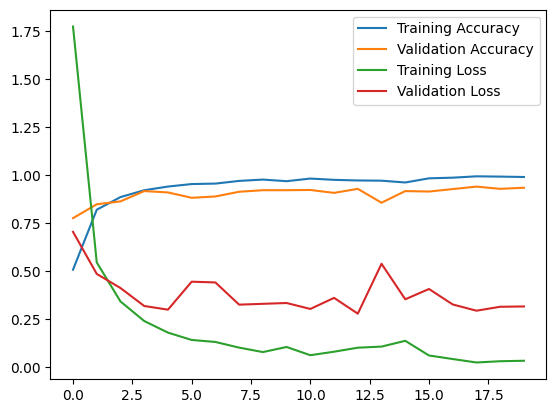

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9384 - loss: 0.3526
Model 1 Test Accuracy: 0.9337
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


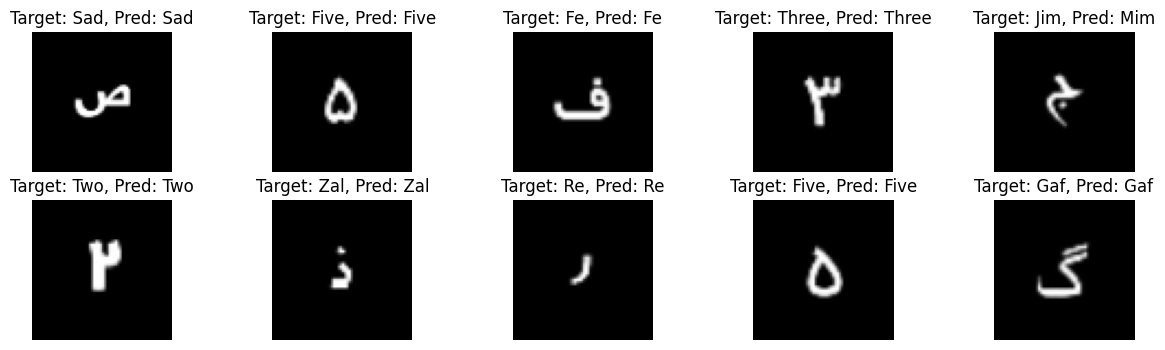

In [ ]:
plt.plot(history_df_1['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_1['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_1['Training_Loss'], label='Training Loss')
plt.plot(history_df_1['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

predictions = model_1.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

# **Plots training and validation accuracy and loss, evaluates the model on the test set, prints the test accuracy, and visualizes 10 test images with their true labels and model predictions.**

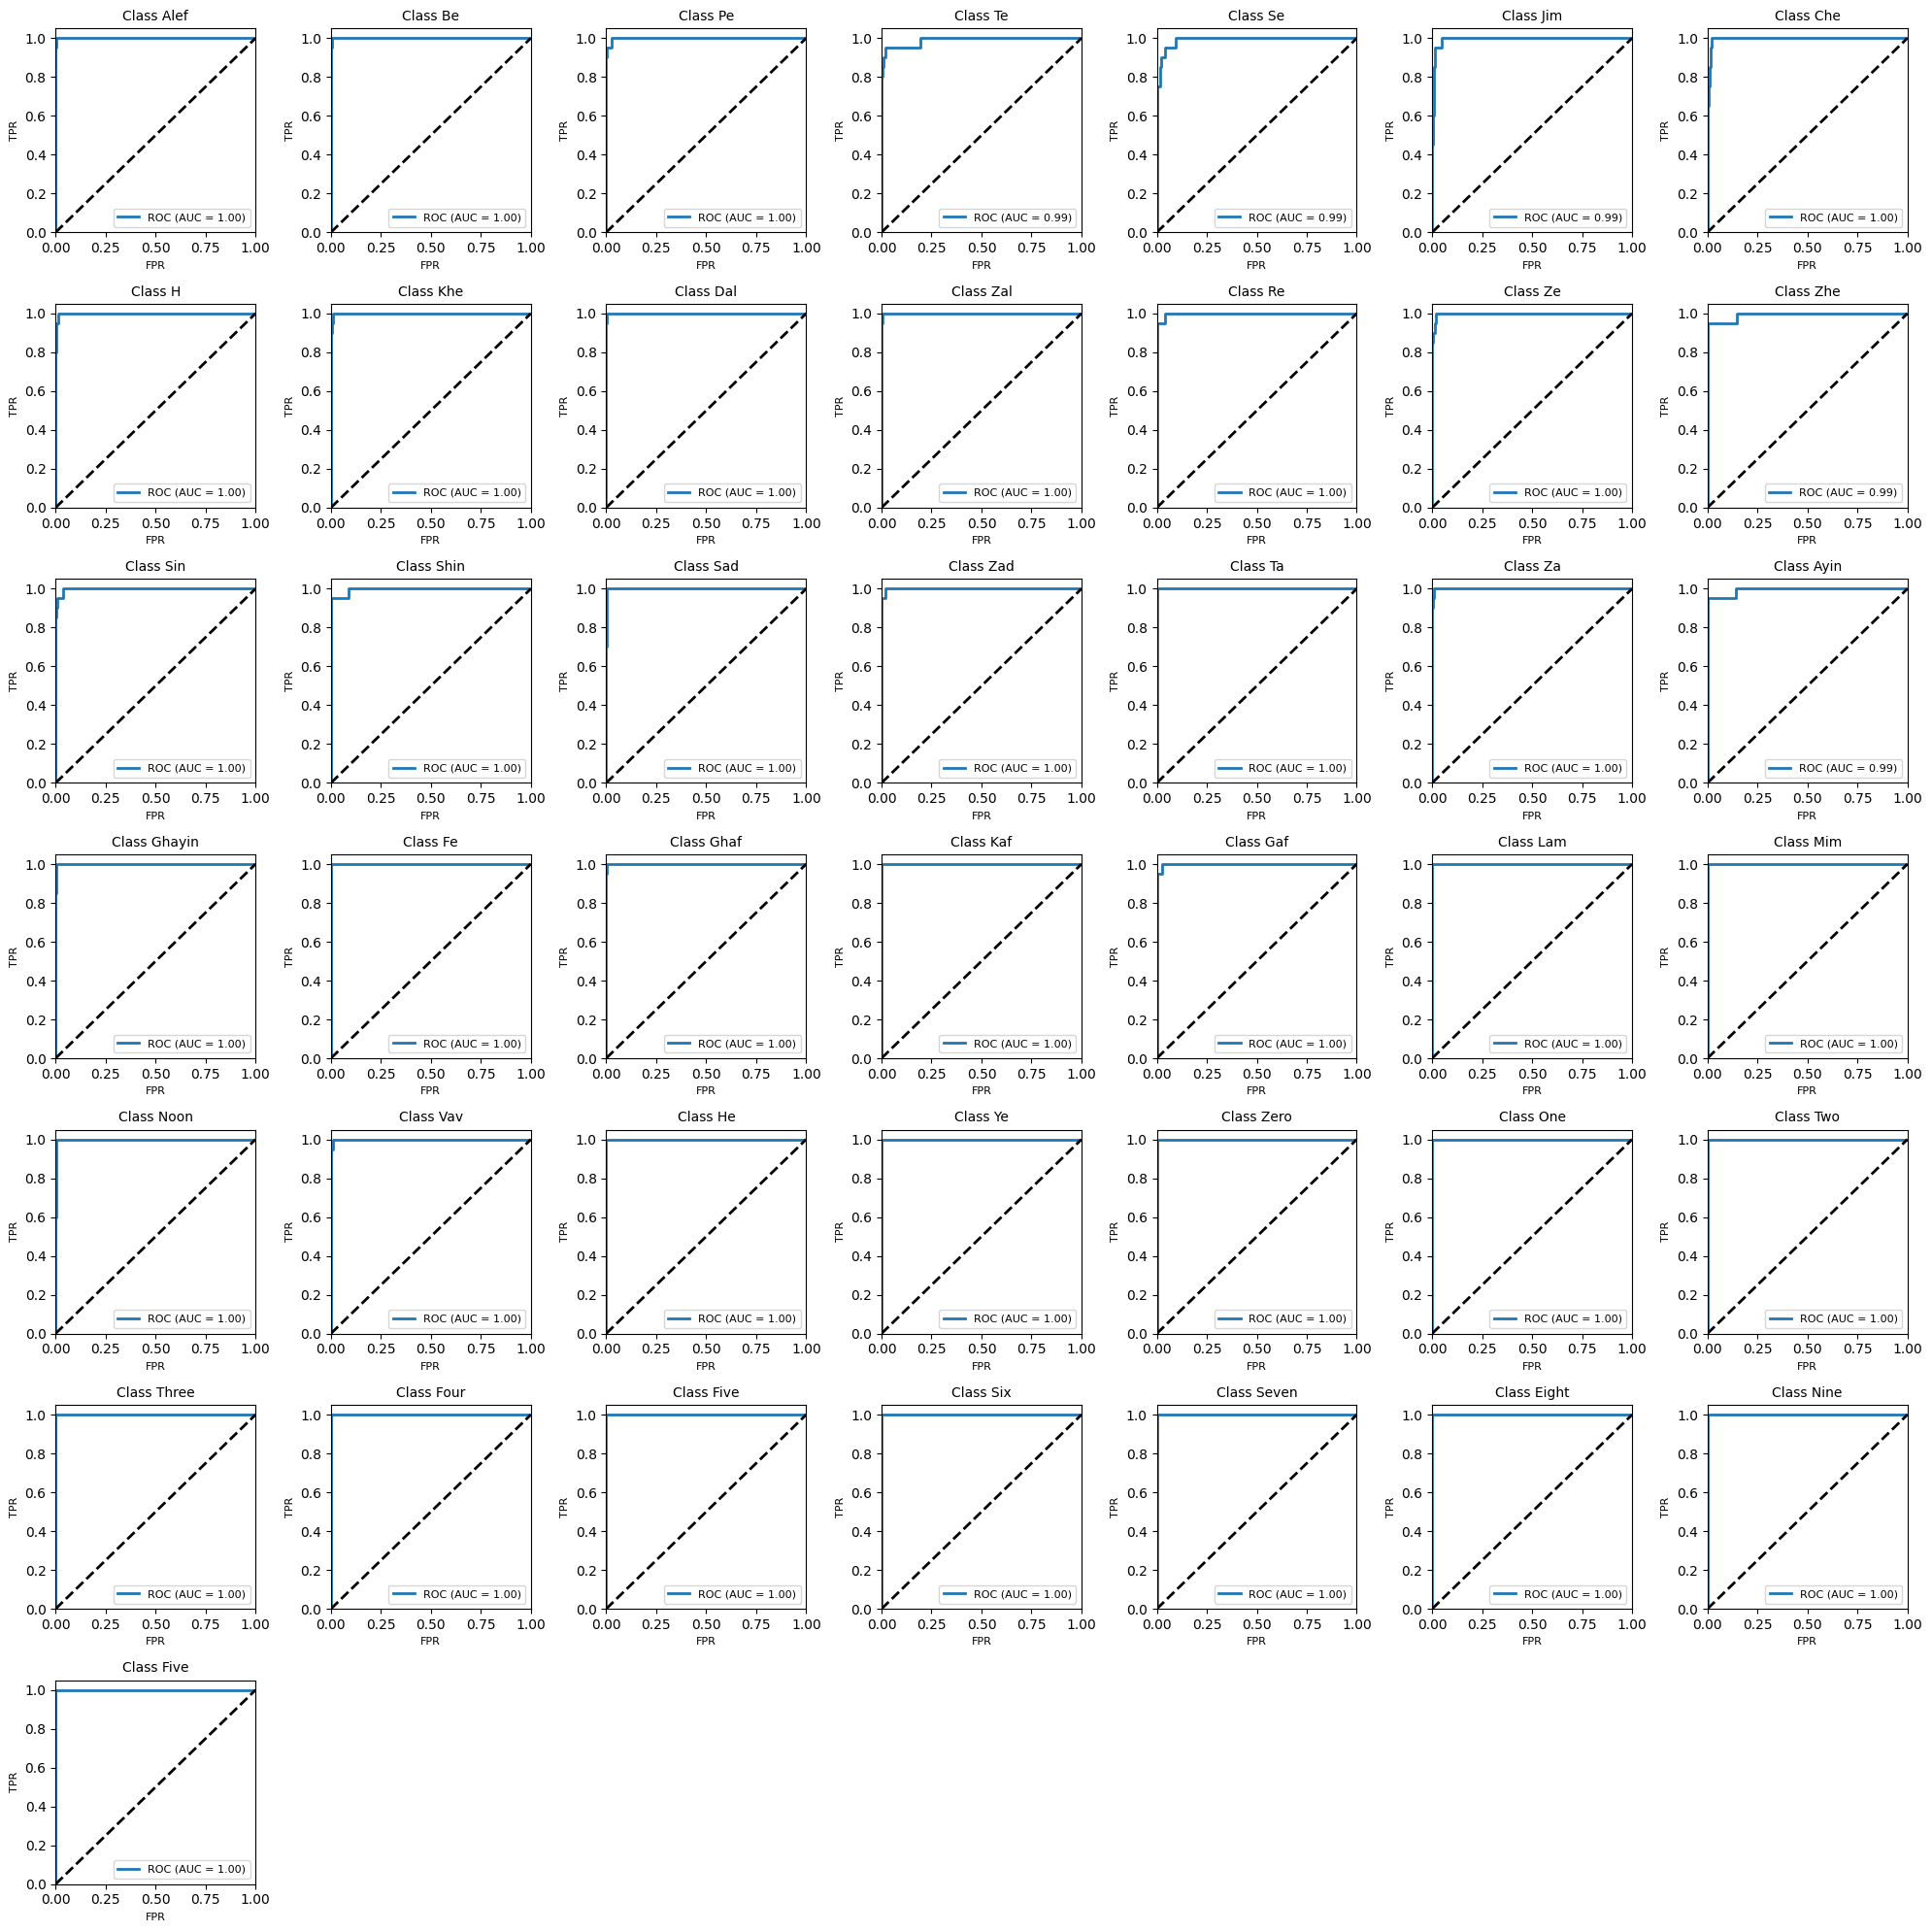

In [ ]:
y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7
n_cols = 7


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# **Defines a convolutional neural network (CNN) with two Conv2D + BatchNormalization + MaxPooling blocks, each followed by dropout. The features are flattened and passed through fully connected layers with ReLU activation, ending with a softmax layer for classification into 43 classes. The model summary shows the architecture details.**

In [ ]:
model_2 = Sequential(name='Model_2')

model_2.add(layers.Input(shape=(1, INPUT_SHAPE[0], INPUT_SHAPE[1])))


model_2.add(layers.Conv2D(filters=4, kernel_size=7, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_1'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_1'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_1'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_1'))

model_2.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_2'))
model_2.add(layers.BatchNormalization(name='Batch_Normalization_2'))
model_2.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_2'))

model_2.add(layers.Dropout(0.25 , name='Drop_out_2'))

model_2.add(layers.Flatten(data_format='channels_first', name='Flattening'))

model_2.add(layers.Dense(512, activation='relu', use_bias=True, name='Fully_Connected_1'))
model_2.add(layers.Dense(256, activation='relu', use_bias=True, name='Fully_Connected_2'))
model_2.add(layers.Dense(CLASSES, activation='softmax', use_bias=True, name='Fully_Connected_3'))

model_2.summary()

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolutional_1 (Conv2D)        │ (None, 4, 58, 58)      │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_1           │ (None, 4, 58, 58)      │           232 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_1 (MaxPooling2D)    │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_1 (Dropout)            │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_2 (Conv2D)        │ (None, 8, 24, 24)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_2           │ (None, 8, 24, 24)      │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2 (MaxPooling2D)    │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_2 (Dropout)            │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flattening (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_1 (Dense)       │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_2 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_3 (Dense)       │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,403 (2.80 MB)

 Trainable params: 734,239 (2.80 MB)

 Non-trainable params: 164 (656.00 B)

# **Compiles the CNN with Adam optimizer and sparse categorical crossentropy loss, trains it on reshaped training data with validation, stores training and validation accuracy and loss in a DataFrame, and displays the results.**

In [ ]:
model_2.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history_2 = model_2.fit(X_train.reshape(3439, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_train, epochs=EPOCHS, validation_data=(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test))

history_df_2 = pd.DataFrame({
    'Training_Accuracy': history_2.history['accuracy'],
    'Validation_Accuracy': history_2.history['val_accuracy'],
    'Training_Loss': history_2.history['loss'],
    'Validation_Loss': history_2.history['val_loss']
})

# model_1.save(f"F:/Programming/Alphabet-Recognition/Models/Neural Network/{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_2)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.3553 - loss: 2.4709 - val_accuracy: 0.7500 - val_loss: 2.0688
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.7991 - loss: 0.5751 - val_accuracy: 0.8360 - val_loss: 1.1071
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8613 - loss: 0.4152 - val_accuracy: 0.8581 - val_loss: 0.5749
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.8839 - loss: 0.3313 - val_accuracy: 0.8814 - val_loss: 0.3571
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - accuracy: 0.9004 - loss: 0.2758 - val_accuracy: 0.9023 - val_loss: 0.2739
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9287 - loss: 0.2113 - val_accuracy: 0.9209 - val_loss: 0.2375
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - accuracy: 0.9340 - loss: 0.1789 - val_accuracy: 0.9151 - val_loss: 0.2312
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 13s 119ms/step - accuracy: 0.9381 - loss: 0.1

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.554522,0.750000,1.595430,2.068782
1,0.810992,0.836047,0.549681,1.107139
2,0.859261,0.858140,0.409569,0.574933
3,0.887758,0.881395,0.321041,0.357131
4,0.902297,0.902326,0.282083,0.273923
5,0.924978,0.920930,0.203466,0.237468
6,0.928758,0.915116,0.192363,0.231177
7,0.929340,0.900000,0.184481,0.297910
8,0.947950,0.917442,0.145588,0.243754
9,0.951730,0.922093,0.137831,0.306536


# **Plots training and validation accuracy and loss for the CNN, evaluates test accuracy, prints it, and visualizes 10 test images with their true labels and predicted labels.**

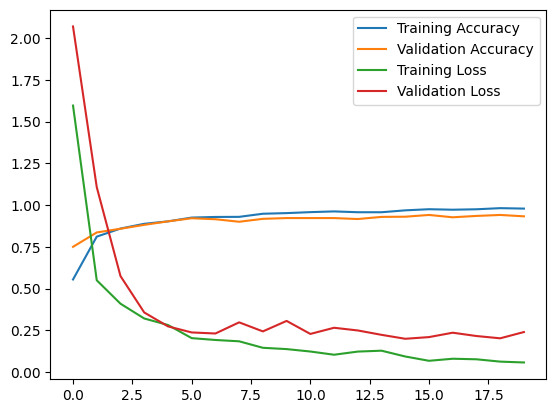

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9309 - loss: 0.2434
Model 2 Test Accuracy: 0.9326
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


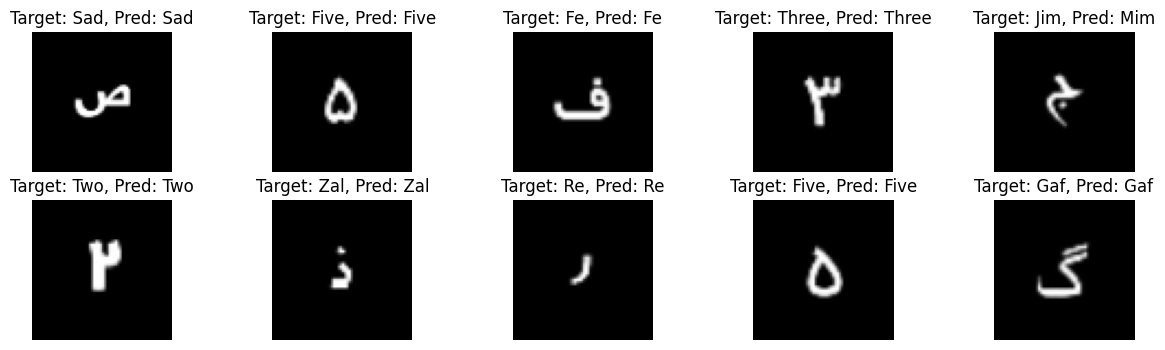

In [ ]:
plt.plot(history_df_2['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_2['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_2['Training_Loss'], label='Training Loss')
plt.plot(history_df_2['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()

test_loss_2, test_acc_2 = model_2.evaluate(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]), y_test)
print(f'Model 2 Test Accuracy: {test_acc_2:.4f}')

# loaded_model = load_model(f"F:/Programming/Alphabet-Recognition/Models/Neural Network/{test_acc_2:.4f}_val_acc.keras")

predictions_2 = model_2.predict(X_test.reshape(860, 1, INPUT_SHAPE[0], INPUT_SHAPE[1]))

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions_2[i])]}')
    plt.axis('off')
    counter+=1
plt.show()
plt.show()

# **Converts test labels to one-hot encoding, computes ROC curves and AUC for each of the 43 classes, and plots the ROC curve for each class in a 7×7 grid, showing classifier performance visually.**

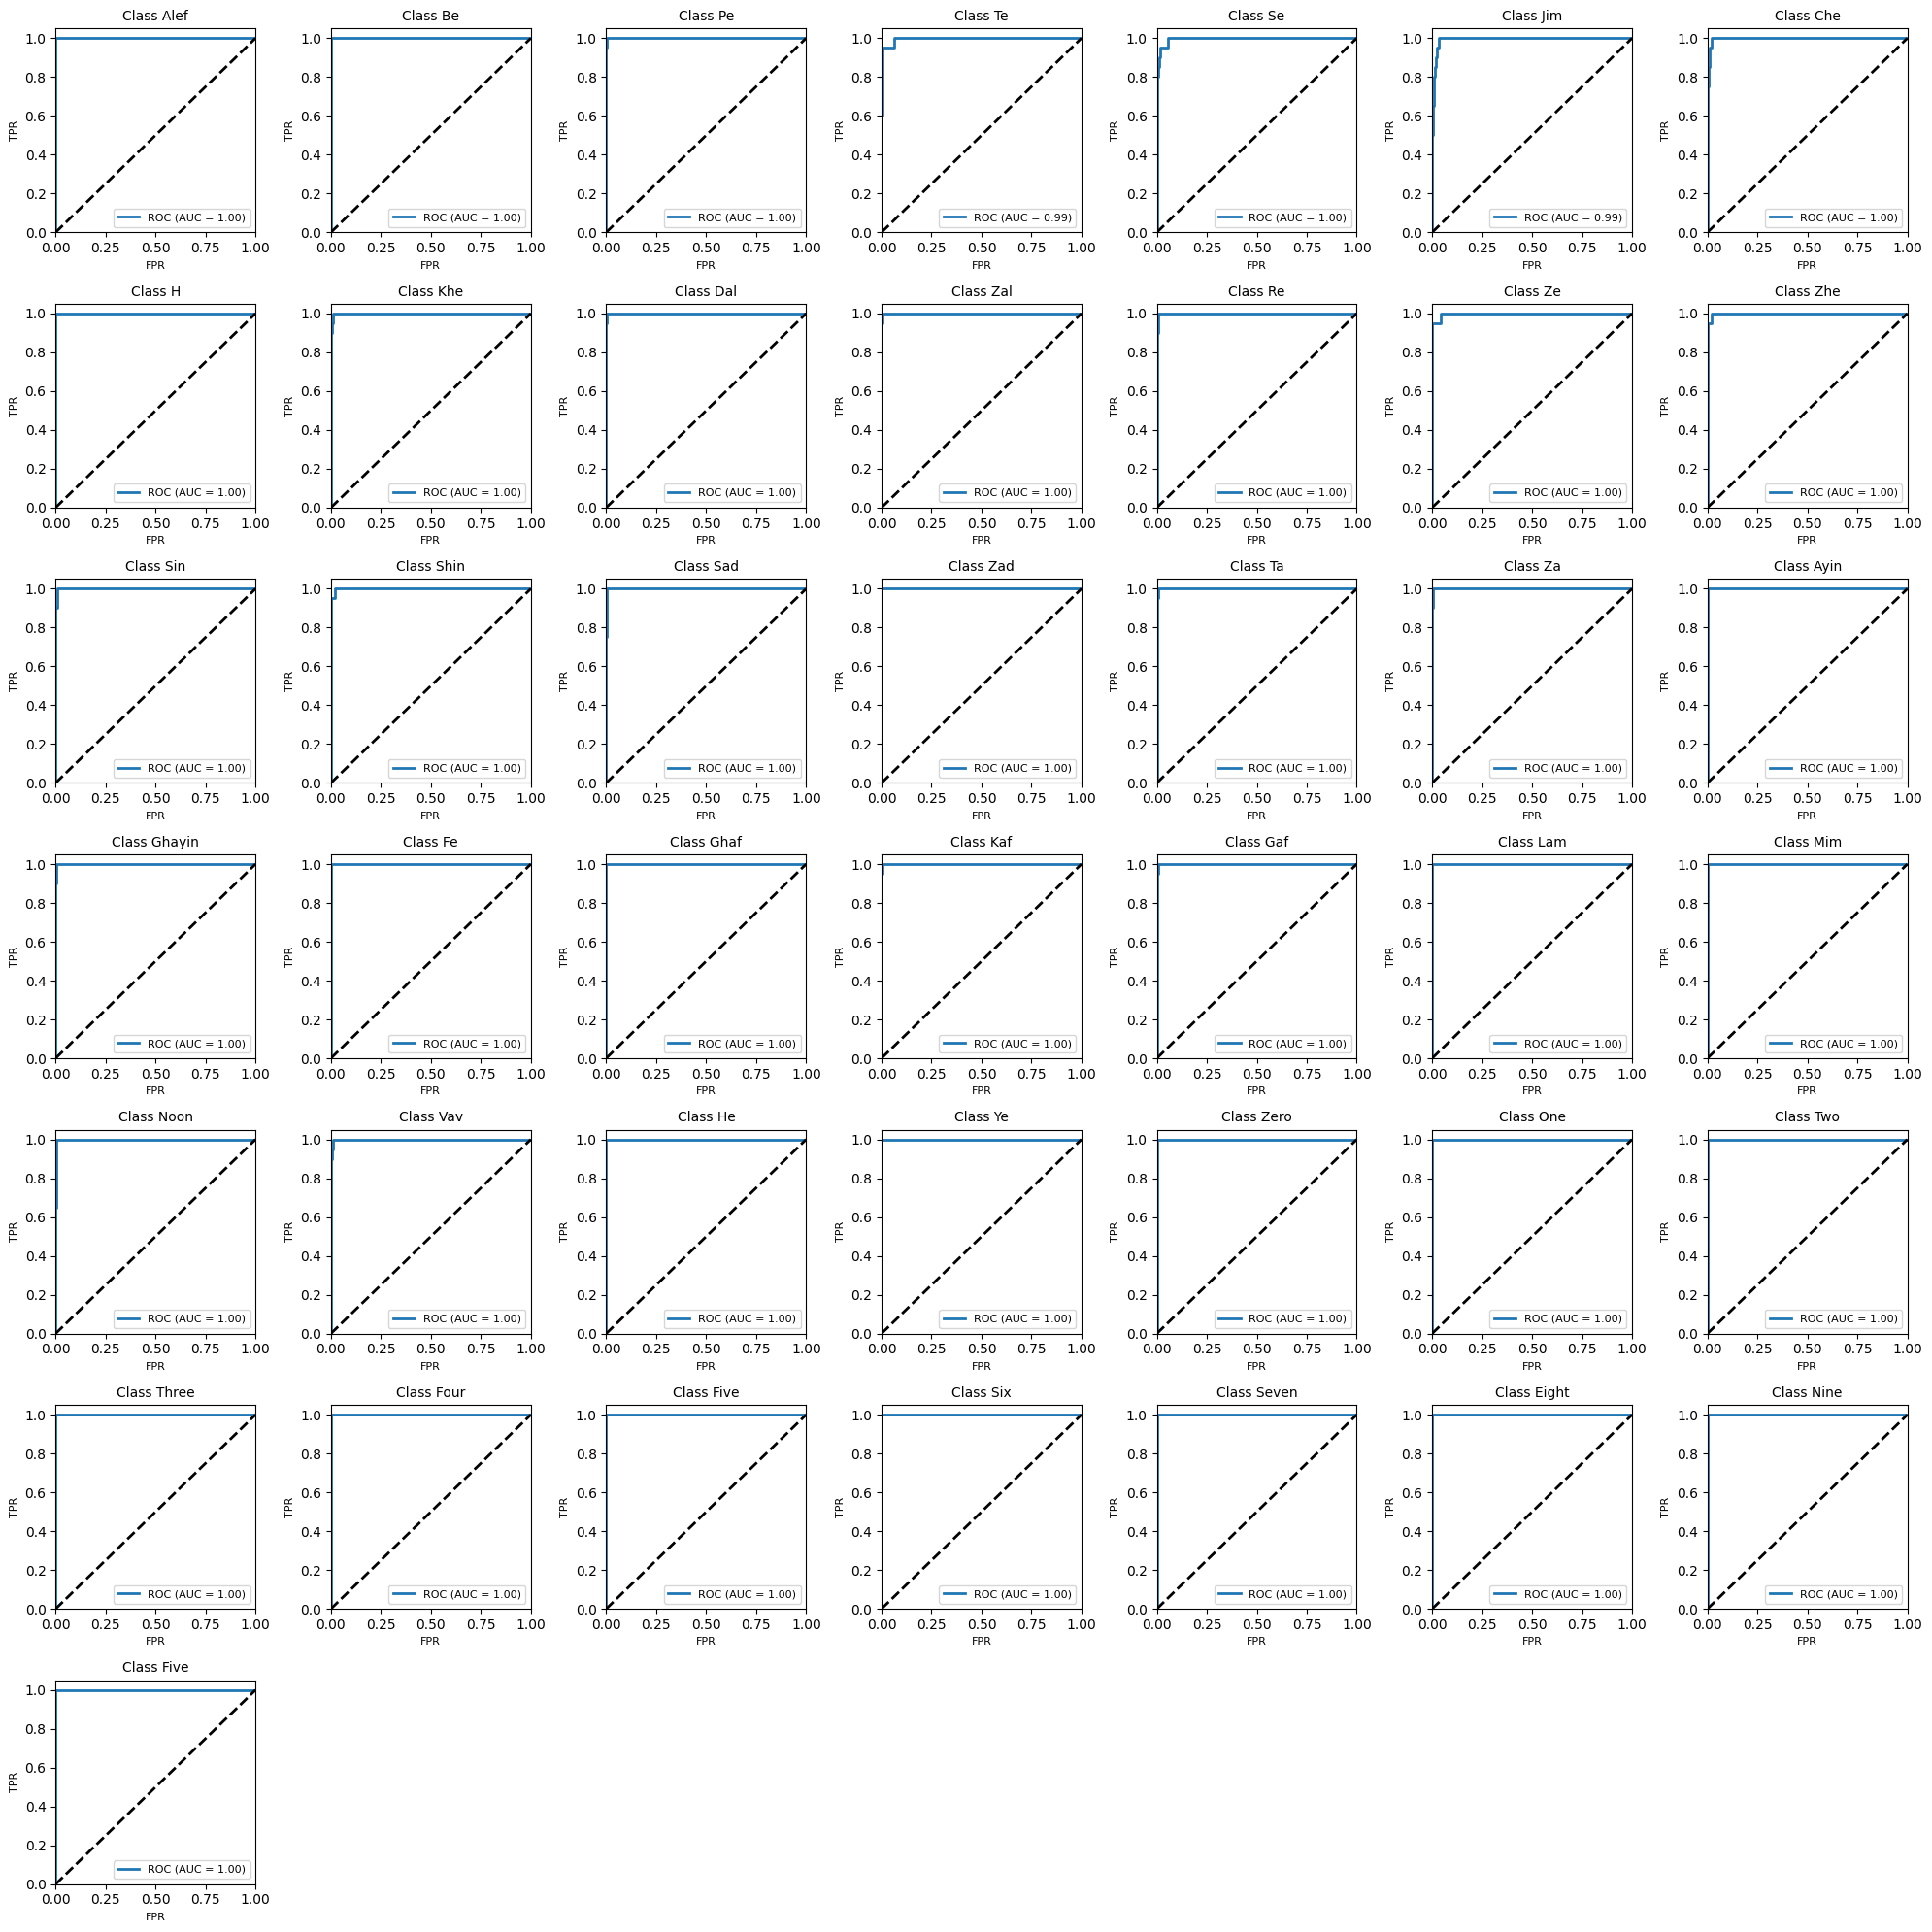

In [ ]:
y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7
n_cols = 7


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# **Loads real-world test images, preprocesses them (centering and normalization), predicts labels using both Model 1 and Model 2, and displays each image with predictions from both models side by side.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


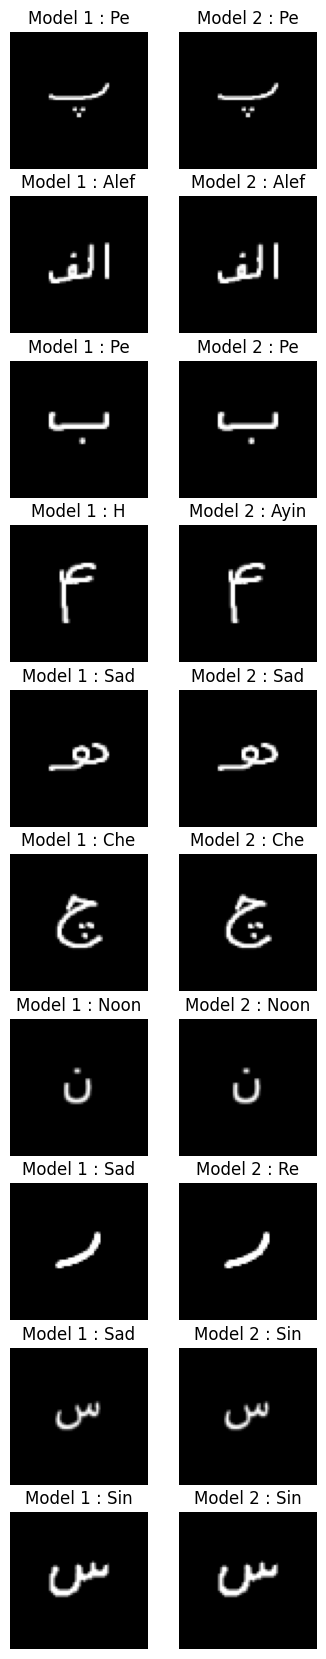

In [ ]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):

    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader1.centerize(image)
    image = dataloader1.normalize(image)


    predictions_test_1 = model_1.predict(image.reshape(1,INPUT_SHAPE[0], INPUT_SHAPE[1]))
    predictions_test_2 = model_2.predict(image.reshape(1,1,INPUT_SHAPE[0],INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Model 1 : {LABELS[np.argmax(predictions_test_1)]}')
    plt.axis('off')

    plt.subplot(rows, 2, 2*i+2)
    plt.imshow(image, cmap='gray')
    plt.title(f'Model 2 : {LABELS[np.argmax(predictions_test_2)]}')
    plt.axis('off')

plt.show()
